In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

news = pd.read_json('../data/database.json')

In [121]:
import calendar
import datetime

# Erstellt eine neue Zeile mit dem Wochentag
news['day_of_week'] = news['date'].dt.day_of_week
news['day_of_week_word'] = news['date'].dt.day_name(locale='de_de') 

news['hour'] = news['date'].dt.hour
news['content_length'] = news['content'].str.len()

In [122]:
news = news.groupby(["hour", "day_of_week"]).agg(content_length_mean=('content_length', 'mean'), amount=('hour', 'size')).reset_index()

In [123]:
news.head()

,hour,day_of_week,content_length_mean,amount
0,0,0,1815.000000,3
1,0,1,2082.000000,3
2,0,2,4826.333333,3
3,0,3,4939.333333,3
4,0,4,2845.666667,3


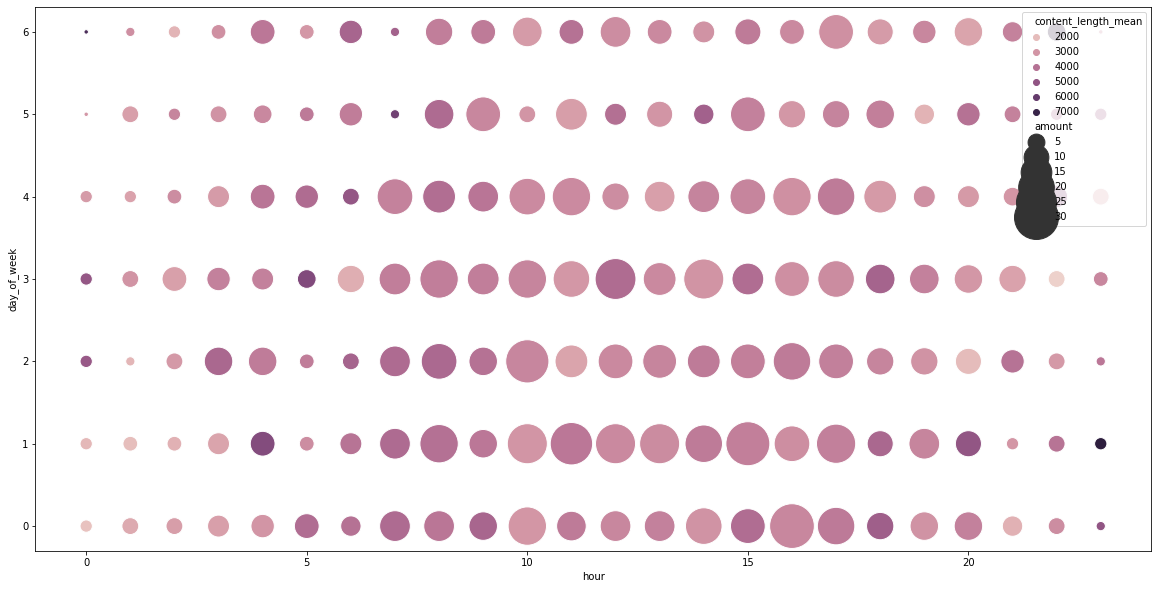

In [127]:
# libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Control figure size for this notebook:
plt.rcParams['figure.figsize'] = [20, 10]


 
# use the scatterplot function to build the bubble map
sns.scatterplot(data=news, x="hour", y="day_of_week", size="amount", hue="content_length_mean", legend=True, sizes=(20, 2000))

# show the graph
plt.show()